<a href="https://colab.research.google.com/github/JSravanreddy/ML-projects/blob/main/gold_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import dependedcies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and preprocessing

In [ ]:
data=pd.read_csv("/gld_price_data[1].csv")

In [ ]:
data.head()
#spx=index of capitailation of 500 companies
#slv silver price 

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# we will try to predict the gold price(GLd)
data.shape

(2290, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#analysis of data
#now we will find the corelation between the features
# we will always find the correlation always in regression models
corre=data.corr()


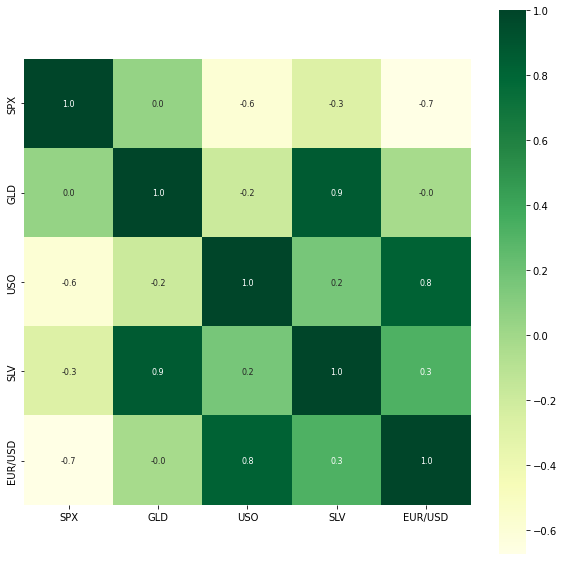

In [ ]:
#heat map
plt.figure(figsize=(10,10))
sns.heatmap(corre,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="YlGn")

In [ ]:
print(corre)
print(corre["GLD"])

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


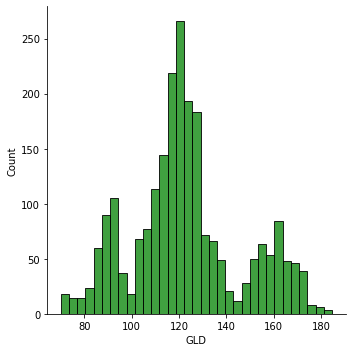

In [ ]:
# checking the distribution of gldplot
sns.displot(data["GLD"],color="green")
#by ploting the graph we can see that the major price values have values at 120

In [ ]:
x=data.drop(["Date","GLD"],axis=1)
y=data["GLD"]
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=79)


In [ ]:
print(xtrain.shape)
print(xtest.shape)

(1717, 4)
(573, 4)


Random forest algoritham

In [ ]:
random=RandomForestRegressor(n_estimators=100)
 

In [ ]:
random.fit(xtrain,ytrain)

RandomForestRegressor()

Prediction on test data 

In [ ]:
predict=random.predict(xtest)
print(predict)

[113.66659861 147.09099978 127.51869987 108.4161007  120.90840129
  91.5855997  126.25660007 121.11300002  85.68689882 120.82610204
 107.27060061 142.30579989 112.84270123 118.7159996  118.91179998
 126.78120063 135.16419868 102.18639858 119.52670129 123.26560001
 103.86389917  83.45349912 164.45089892 150.4806021  128.34120169
 120.59650074 160.48570231  89.08159867 127.82520112 135.03590487
 156.09730131  87.92129873 156.65460152 107.90479909 113.03230099
  91.59120021 111.6140999   92.69879966 119.40259952 130.64210138
 126.11379941  97.40589734 132.14709978 130.63310197 115.9371999
 120.61109875  83.53840029 121.60370274  89.19279919 124.45103983
 117.23089991  87.60679798 120.65060071 115.97819937 143.27390228
  87.58889967 119.35030054 101.92639903  86.52439822 151.89739906
 119.79509876 113.62830086 113.86910059 127.6296999  142.83800053
 119.75719872 124.60470176 111.59220051 108.23589896 153.24060062
 108.53209856 173.9020984  124.61420051 134.13310031 125.67230151
 119.998300

In [ ]:
# we will measure thr error
#R-squared error
score=metrics.r2_score(ytest,predict)
print(score)
#mean absolute error
score1=metrics.mean_absolute_error(ytest,predict)
print(score1)

0.9880236673772208
1.3769926841186722


In [ ]:
#compare the acutal values and predicted values
ytest=list(ytest)

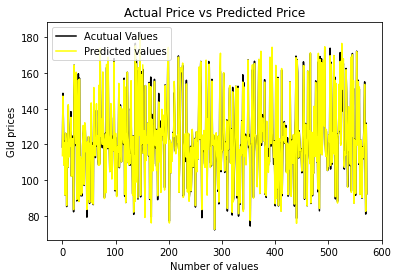

In [ ]:
plt.plot(ytest,color="black",label="Acutual Values")
plt.plot(predict,color="yellow",label="Predicted values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("Gld prices")
plt.legend()
plt.show()

